In [1]:
import pandas as pd
import re

In [2]:
angry = pd.read_csv('../../data/continuous_rehydrated/interim_data/angry_brexit_tweets.csv')

In [3]:
print(angry.head())

             id sentiment                                               text
0  1.113445e+18     anger  "Have we left the EU yet?" "How will the #UKIP...
1  1.113445e+18     anger  Macron, Irish PM urge UK to propose alternativ...
2  1.113445e+18     anger  "I'm absolutely appalled" - Conservative Iain ...
3  1.113445e+18     anger  @SteveBakerHW @Kilsally Steve you're a #brexit...
4  1.113445e+18     anger  I look forward to the day the #snp win a secon...


In [6]:
angry_ppl = angry[angry.text.str.contains("@", na=False)]
#text = re.sub(r'@[A-Za-z0-9]+','', tweet)
angry_ppl.head()
#angry_ppl.text.astype(str)
def find_mentions(text):
    return re.findall(r'@[A-Za-z0-9_]+', text)

def find_hashtags(text):
    return re.findall(r'#[A-Za-z0-9]+', text)

mentions = angry_ppl.text.apply(find_mentions)
hashtags = angry_ppl.text.apply(find_hashtags)

In [4]:
def count_column_values(column):
    values = []
    for row in column:
        values.extend(row)
    return pd.Series(values).str.lower().value_counts()

In [7]:
mentions = count_column_values(mentions)[0:20]
mentions

@theresa_may        58820
@uklabour           33749
@conservatives      26315
@theindgroup        25166
@skynews            21873
@jeremycorbyn       18065
@peoplesvote_uk     17127
@nigel_farage       16128
@mrjamesob          15775
@anna_soubry        15763
@eucopresident      13636
@thesnp             13112
@borisjohnson       12748
@bbcnews            12673
@bbcr4today         10847
@houseofcommons     10646
@jacob_rees_mogg     8794
@carolecadwalla      7003
@liamfox             6957
@channel4news        6483
dtype: int64

Text(0.5, 1.0, 'The most mentioned users in angry tweets')

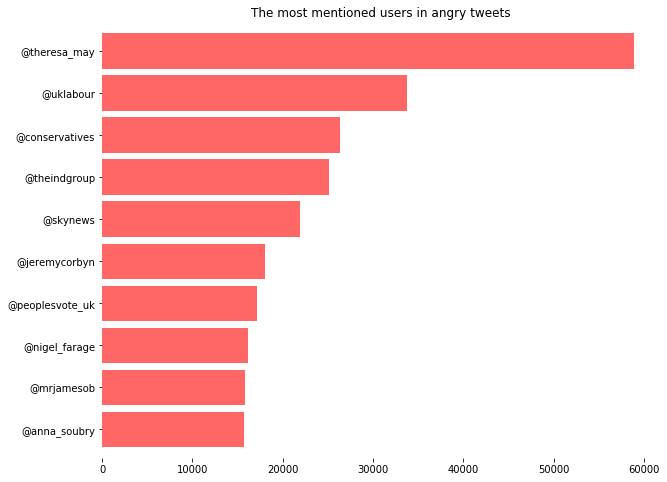

In [15]:
ax = mentions[0:10].iloc[::-1].plot.barh(figsize=(10,8), zorder=2, width=0.85, color="#ff6666")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("The most mentioned users in angry tweets")

In [7]:
count_column_values(hashtags)[0:20]

#brexit                 6799
#brexitbetrayal         6357
#maymustgo              1195
#leavemeansleave         553
#standup4brexit          356
#brexitcrisis            317
#nodeal                  306
#letsgowto               266
#eu                      252
#leave                   232
#brexitshambles          186
#brexitday               169
#brexitbetrayalmarch     168
#wtobrexit               166
#labour                  154
#peoplesvote             152
#brexitmayhem            150
#conservatives           148
#uk                      130
#marchtoleave            129
dtype: int64

In [8]:
from nltk.corpus import stopwords
# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
stop_words = stopwords.words('english')

def clean_tweet(tweet):
    #screen names
    text = re.sub(r'@[A-Za-z0-9]+','', tweet)
    # urls
    text = re.sub('https?://[A-Za-z0-9./]+','', text)
    #remove special characters
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    lower_case = letters_only.lower()
    # tokenize to words and remove stop words
    tokenized_words = tok.tokenize(lower_case)
    words = [word for word in tokenized_words if word not in stop_words]
    return (" ".join(words)).strip()


print(angry_ppl.text.iloc[10])
clean_tweet(angry_ppl.text.iloc[10])

Hmm, surprise surprise @BBCNews giving Margaret Anne Georgiadou, the lady responsible for the 'Revoke Article 50' petition, a very long interview.

BBC is EU biased nonsense.

#BrexitBetrayal
#LeaveMeansLeave 
#NoDealBrexit
#Brexit
#MayMustGo


'hmm surprise surprise giving margaret anne georgiadou lady responsible revoke article petition long interview bbc eu biased nonsense brexitbetrayal leavemeansleave nodealbrexit brexit maymustgo'

In [10]:
def count_keywords(column):
    hashtags = []
    for row in column:
        hashtags.extend(row.split())
    return pd.Series(hashtags)

In [11]:
res = angry_ppl.text.apply(clean_tweet)

In [12]:
count_keywords(res).value_counts()[0:20]

brexit            8101
brexitbetrayal    6357
may               3730
vote              1807
people            1349
eu                1303
maymustgo         1195
resign            1193
go                1164
th                1142
theresa           1114
april             1037
retweet           1028
bigger             989
hrs                987
sample             984
deal               977
amp                889
leave              865
democracy          764
dtype: int64

In [ ]:
angry.shape

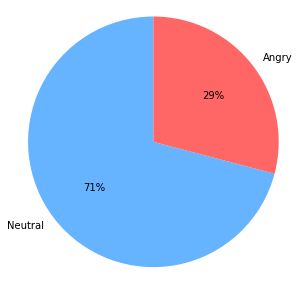

In [39]:
# plot all tweets timeline
# plot angry tweets
import matplotlib.pyplot as plt
labels = 'Neutral', 'Angry'
sizes = [3941653, 1617734]
colors = ['#66b3ff', '#ff6666']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.0f%%', startangle=90)

plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.savefig('angry_tweets.png')